# DataCamp Certification Case Study

### Project Brief

You have been hired by Inn the Neighborhood, an online platform that allows people to rent out their properties for short stays. Currently, the webpage for renters has a conversion rate of 2%. This means that most people leave the platform without signing up. 

The product manager would like to increase this conversion rate. They are interested in developing an application to help people estimate the money they could earn renting out their living space. They hope that this would make people more likely to sign up.

The company has provided you with a dataset that includes details about each property rented, as well as the price charged per night. They want to avoid estimating prices that are more than 25 dollars off of the actual price, as this may discourage people.

You will need to present your findings in two formats:
- You must submit a written report summarising your analysis to your manager. As a data science manager, your manager has a strong technical background and wants to understand what you have done and why. 
- You will then need to share your findings with the product manager in a 10 minute presentation. The product manager has no data science background but is familiar with basic data related terminology. 

The data you will use for this analysis can be accessed here: `"data/rentals.csv"`

  # Case Study Project - Property Rentals
   
![RENT](https://www.investopedia.com/thmb/DqyYPnFRzg103UuMIVGZtjmhMTA=/380x254/filters:fill(auto,1)/rentpicrent-5bfc2d0746e0fb0051be21f0.jpg)

- First we'll start off by loading and viewing the dataset
- From this we'll be able to see a mixture of numerical data and non-numerical features, that it contains values from different ranges plus a number of missing entries
- We will have to preprocess the data to ensure the machine learning model we choose can make good predictions
- After our data is in good shape, we will carry out some exploratory analysis to build our intuitions.
- Finally, we will build a machine learning model that can predict the prices for rental properties with given features


In [ ]:
# import the necessary library with its alias
import pandas as pd

# Load the dataset to a dataframe
rentals = pd.read_csv('data/rentals.csv')


# Get a look at the data
rentals.head()

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
0,958,37.76931,-122.43386,Apartment,Entire home/apt,1.0,1.0,1,$170.00
1,3850,37.75402,-122.45805,House,Private room,1.0,1.0,1,$99.00
2,5858,37.74511,-122.42102,Apartment,Entire home/apt,1.0,2.0,30,$235.00
3,7918,37.76669,-122.45250,Apartment,Private room,4.0,1.0,32,$65.00
4,8142,37.76487,-122.45183,Apartment,Private room,4.0,1.0,32,$65.00


# 2. Inspecting the applications

The output appears confusing at first sight , but let's try and figure out the most important features in predicting prices . The probable features are *room_type, property_type, number of bedrooms, number of bathrooms, minimum_nights, the location by longitude and latitude* We can be able to tell from first glance the dataset has a mixture of both numerical and non-numerical datatype/inefficient object datatype. This can be done with preprocessing of the data

In [ ]:
# Extract summary statistics
print(rentals.describe())

# print Dataframe information
print(rentals.info())

# Inspect missing values in the dataset
rentals.tail()

                 id     latitude    longitude    bathrooms     bedrooms  \
count  8.111000e+03  8111.000000  8111.000000  8099.000000  8107.000000   
mean   2.024561e+07    37.766054  -122.430107     1.395975     1.345874   
std    1.228565e+07     0.022937     0.026967     0.923213     0.925298   
min    9.580000e+02    37.704630  -122.513060     0.000000     0.000000   
25%    8.905668e+06    37.751450  -122.442830     1.000000     1.000000   
50%    2.161057e+07    37.769150  -122.424650     1.000000     1.000000   
75%    3.120025e+07    37.785670  -122.410615     1.500000     2.000000   
max    3.935418e+07    37.828790  -122.368570    14.000000    14.000000   

       minimum_nights  
count    8.111000e+03  
mean     1.234526e+04  
std      1.110357e+06  
min      1.000000e+00  
25%      2.000000e+00  
50%      4.000000e+00  
75%      3.000000e+01  
max      1.000000e+08  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8111 entries, 0 to 8110
Data columns (total 9 columns):
 #

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
8106,39342094,37.74010,-122.41196,House,Private room,2.0,3.0,30,$699.00
8107,39343373,37.77799,-122.42159,Condominium,Entire home/apt,1.0,1.0,1,$200.00
8108,39344101,37.73410,-122.38917,Hut,Private room,2.0,1.0,30,$69.00
8109,39350028,37.78144,-122.41207,Apartment,Entire home/apt,1.0,1.0,30,$187.00
8110,39354181,37.70707,-122.44812,House,Private room,1.0,2.0,1,$200.00


# 3. Handling the missing values

Our dataset contains both numeric and non-numeric data (specifically data that are of float64, int64 and object types).
Observing the dataset using the *isnull()* method and counting the sum indicates the missing values but due to the proportion being nearly less than 10% dropping them will not affect the data as much<br/>
We'll then take a look at unique values to look for characters such as Unknown and '?'<br/>
Ignoring missing values can affect the performance of a machine learning model heavily. While ignoring the missing values our machine learning model may miss out on information about the dataset that may be useful for its training. Then, there are many models which cannot handle missing values implicitly such as Linear Discriminant Analysis (LDA).

In [ ]:
# Counting the null values in the Dataframe
print(rentals.isnull().sum())

# Dropping the missing values
rentals = rentals.dropna()
rentals = rentals.drop('id', axis=1)

# Creating a columns list
columns = rentals.columns

# From unique values looking for "dirty" characters 
chars = ['?', 'Unkown']
for i in columns:
    for j in chars:
        if i == j:
            print(f'\t\t\t {i}\n', rentals[f'{i}'].unique())


id                 0
latitude           0
longitude          0
property_type      0
room_type          0
bathrooms         12
bedrooms           4
minimum_nights     0
price              0
dtype: int64


# 4. Preprocessing the data 
The missing values are now successfully handled.<br/>

There is still some minor but essential data preprocessing needed before we proceed towards building our machine learning model. We are going to divide these remaining preprocessing steps into two main tasks:

- Convert the non-numeric data into numeric.
- Convert object to categorical data

First, we will be converting all the non-numeric values into numeric ones. We do this because not only it results in a faster computation but also many machine learning models  require the data to be in a strictly numeric format. 

In [ ]:
# Converting object columns to categorical variable
rentals.room_type = rentals.room_type.astype('category')
rentals.property_type = rentals.property_type.astype('category')

# Converting the price column to numerical datatype
rentals.price = rentals.price.str.replace('$', '', regex=True).replace(',', '', regex=True)
rentals.price = pd.to_numeric(rentals.price, errors='raise')

# Inspecting the dataframe
rentals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8095 entries, 0 to 8110
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   latitude            8095 non-null   float64 
 1   longitude           8095 non-null   float64 
 2   property_type       8095 non-null   category
 3   room_type           8095 non-null   category
 4   bathrooms           8095 non-null   float64 
 5   bedrooms            8095 non-null   float64 
 6   minimum_nights      8095 non-null   int64   
 7   price               8095 non-null   float64 
 8   harvesine_distance  8095 non-null   float64 
dtypes: category(2), float64(6), int64(1)
memory usage: 523.2 KB


# 5. Outliers

In our data, there are some values higher than others. These values affect statistical values and create bias. These are called outliers. The best practice is to remove such outliers before the training model.<br/>
We can use .describe() for finding outliers. First, see the mean of DataFrame which is an average value from the whole dataset. Percentile values lets us find the threshold for removing outliers.<br/>
From data, it is clear that the difference between the maximum value and 75th percentile is high and there should be some outliers. Let’s check this using box plot.<br/>


First lets check metadata regarding different columns of the DataFrame using .info() method.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

rentals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8095 entries, 0 to 8110
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   latitude            8095 non-null   float64 
 1   longitude           8095 non-null   float64 
 2   property_type       8095 non-null   category
 3   room_type           8095 non-null   category
 4   bathrooms           8095 non-null   float64 
 5   bedrooms            8095 non-null   float64 
 6   minimum_nights      8095 non-null   int64   
 7   price               8095 non-null   float64 
 8   harvesine_distance  8095 non-null   float64 
dtypes: category(2), float64(6), int64(1)
memory usage: 523.2 KB


Use `describe() `for getting different statistical values of numerical fields. These statistical values are important for cleaning purposes.

In [ ]:
rentals.describe()


,latitude,longitude,bathrooms,bedrooms,minimum_nights,price,harvesine_distance
count,8095.000000,8095.000000,8095.000000,8095.000000,8.095000e+03,8095.000000,8095.000000
mean,37.766017,-122.430126,1.395862,1.346387,1.236963e+04,225.646325,12796.653312
std,0.022937,0.026974,0.923114,0.925888,1.111454e+06,412.575797,2.549932
min,37.704630,-122.513060,0.000000,0.000000,1.000000e+00,0.000000,12789.740830
25%,37.751430,-122.442855,1.000000,1.000000,2.000000e+00,100.000000,12794.603456
50%,37.769090,-122.424670,1.000000,1.000000,4.000000e+00,150.000000,12796.293386
75%,37.785600,-122.410625,1.500000,2.000000,3.000000e+01,240.000000,12797.997440
max,37.828790,-122.368570,14.000000,14.000000,1.000000e+08,10000.000000,12804.307092


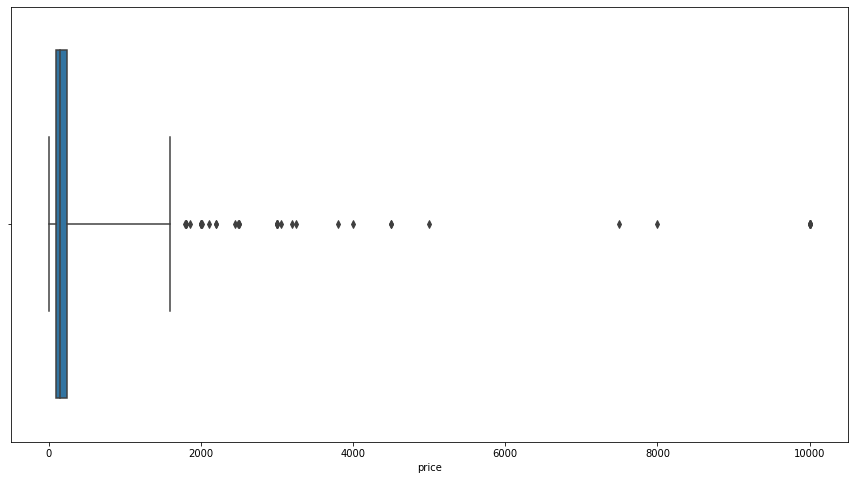

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

sns.boxplot(x='price',data =rentals,whis=10)
plt.show()

We then remove outliers by the use of quatile range.


In [ ]:
q_low = rentals["price"].quantile(0.01)
q_hi  = rentals["price"].quantile(0.99)
rentals_filtered = rentals[(rentals["price"] < q_hi) & (rentals["price"] > q_low)]
rentals.drop(rentals_filtered.loc[rentals_filtered['minimum_nights']==100000000].index, inplace = True)

We removed outliers and again plotted
 the data on the box plot. A graph without outliers looks more appealing than one with outliers.

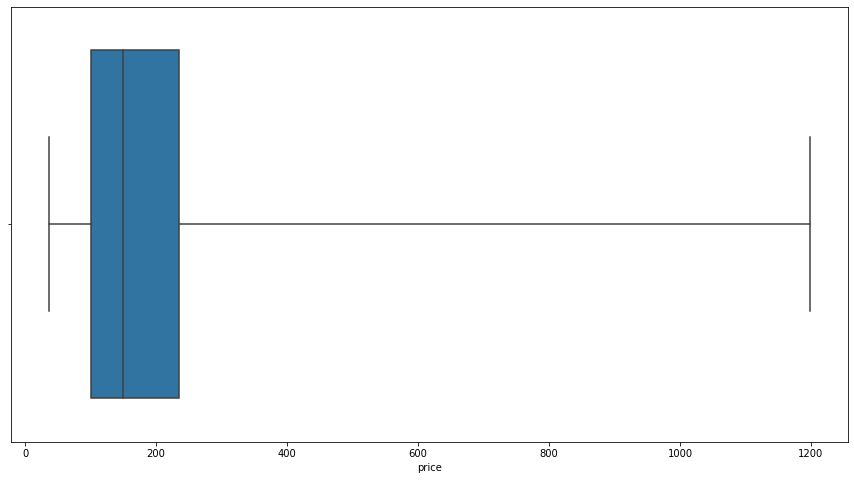

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

sns.boxplot(x='price',data =rentals_filtered,whis=10)
plt.show()

# 6. Visualizations<br/>
EDA is not complete without visualizations. As compared to statistical values, plots give a lot more information and show us patterns in data.<br/>
Using `sns.distplot()` we ploted a distribution graph of price.

<AxesSubplot:xlabel='price', ylabel='Density'>

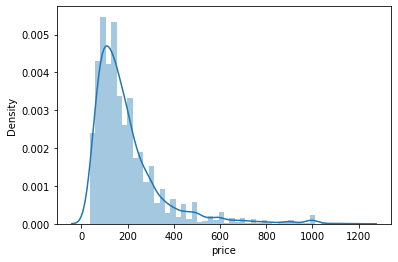

In [ ]:
fig.set_size_inches(15, 8)

sns.distplot(rentals_filtered['price'])

### Violin plot
The violin plot is used for checking the statistics of data visually. It is also helpful at identifying outliers more precisely compared to numerical values. EDA is not complete unless some information is retrieved from the visualizations.<br/>
Using `sns.violinplot()` we ploted a violin plot of room type to price.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Entire home/apt'),
  Text(1, 0, 'Hotel room'),
  Text(2, 0, 'Private room'),
  Text(3, 0, 'Shared room')])

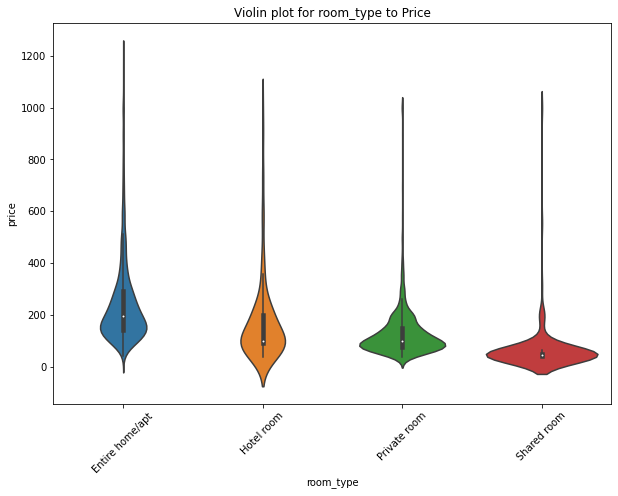

In [ ]:
plt.figure(figsize=(10,7), facecolor='w', edgecolor='k')
sns.violinplot(rentals_filtered['room_type'], rentals_filtered['price'])
plt.title("Violin plot for room_type to Price")
plt.xticks(rotation=45)

### Scatter plot
Our price category is related to the location, so we can plot the location based on the Latitude and Longitude provided in the dataset. <br/>
Using `sns.scatterplot()` we can see the relationship between the location and pricing.


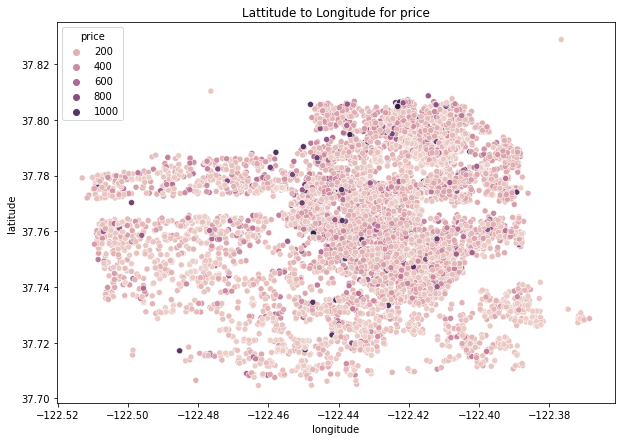

In [ ]:

plt.figure(figsize=(10,7), facecolor='w', edgecolor='k')
sns.scatterplot(rentals_filtered["longitude"], rentals_filtered["latitude"], hue=rentals_filtered['price'])
plt.title("Lattitude to Longitude for price")
plt.show()

Another scatterplot of    against price was ploted to show the relationship they have.

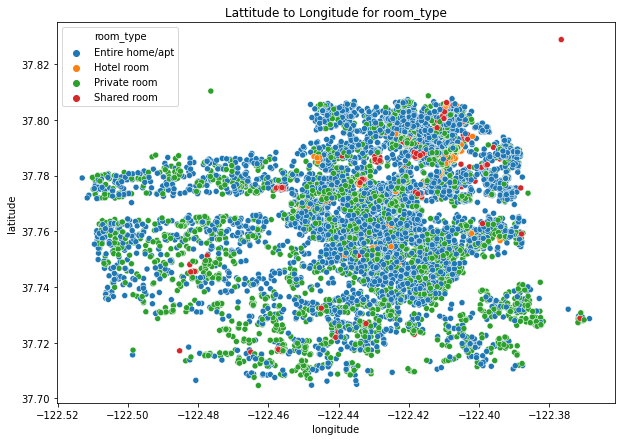

In [ ]:
plt.figure(figsize=(10,7), facecolor='w', edgecolor='k')
sns.scatterplot(rentals_filtered["longitude"], rentals_filtered["latitude"], hue=rentals_filtered['room_type'])
plt.title("Lattitude to Longitude for room_type")
plt.show()

### Heatmap
Using `sns.heatmap` we found the corelations of the features of the rentals dataframe.

<AxesSubplot:>

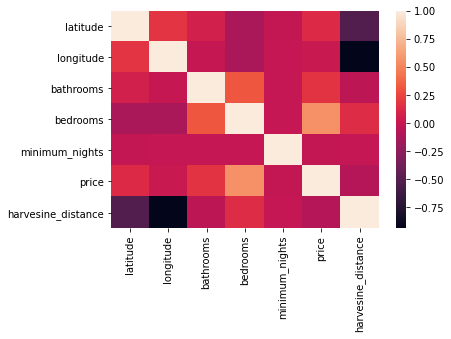

In [ ]:
sns.heatmap(rentals_filtered.corr())

# 7. Feature selection

The process of Feature Engineering is important for the high accuracy of the prediction model. Good features increase the probability of high accuracy but bad features could also create load on the machine and decrease accuracy. Selected features should be related to the label of the dataset. More relation with data means high accuracy.
Further, feature engineering includes converting data into a more computation friendly format. Categorical data is converted into numerical form, dates are converted into a timestamp, string features should be removed and strings should be converted to numbers.


After the features are generated, the dataset should split into train-test datasets with the 80/20 ratio. Splitting is helpful in evaluating the performance of the model. We can’t test the model on train data because the model has already worked with that data

In [ ]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

rentals_filtered['property_type'] = label_encoder.fit_transform(rentals_filtered['property_type'])
rentals_filtered['room_type'] = label_encoder.fit_transform(rentals_filtered['room_type'])


from sklearn.model_selection import train_test_split

x = rentals_filtered.drop('price',axis='columns').values
y = rentals_filtered[['price']].values


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# 8. Model Fitting 

## Modeling
Modeling is the part where all the above sections will be used and the quality of data will be tested. Our problem is for Regressor models and we are using regressors from scikit-learn for prediction. Training data is used for training the model and testing data could be used for testing the model. For finding the optimal model, we’ll train multiple models and find their train-test accuracy and then select the best performing model. We are using the following models:
- Linear Regression
- Random Forest Regressor
- Gradient Boosting Regressor 

We should try Hyperparameter Tuning to increase the accuracy of the model.
## Hyperparameter Tuning
Models have parameters that affect the way the model approaches data. All the algorithms have multiple types of parameters suitable for different types of data. Better tuning increases accuracy and vice-versa. There are functions like GridSearchCV for finding optimal hyperparameters. GridSearchCV required a grid of parameters to iterate the model with and returning the highest accuracy parameters in output. You need to be careful while tuning hyperparameters as this can lead to overfitting or underfitting.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
lr.fit(x_train, y_train)
print("Linear Regression R^2 Score: ", lr.score(x_train, y_train))
print("Linear Regression Test R^2 Score: ", lr.score(x_test, y_test))
y_pred = lr.predict(x_test)
print("Mean Squared Error: ", mean_squared_error(y_pred, y_test))
print("Mean Absolute Error: ", mean_absolute_error(y_pred, y_test))
print("Cross Validation Score: ", cross_val_score(lr, x_test, y_test, cv=5))

Linear Regression R^2 Score:  0.3902237990911971
Linear Regression Test R^2 Score:  0.4428308630962584
Mean Squared Error:  14289.461023090947
Mean Absolute Error:  77.6311722373063
Cross Validation Score:  [0.45966406 0.44033136 0.3931126  0.54147494 0.55275723]


# 9. Evaluation
There are multiple parameters for evaluating our model based on the label of the dataset. Categorical labels have different ways of evaluation whereas Regression has different evaluations. Following methods are used for evaluation with Regression:
- R² Score
- Root Mean Square Error (RMSE)
- Mean Absolute Error (MAE)
- AUC-ROC curve
- Confidence interval

## Cross-Validation
Cross-validation is part of the evaluation. It divides data into multiple chunks and then tests the model on these data chunks randomly.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

rfr = RandomForestRegressor(n_estimators=1000, max_depth=5, n_jobs=-1, random_state=12)
rfr.fit(x_train, y_train)
print("Random Forest R^2 Score: ", rfr.score(x_train, y_train))
print("Random Forest Test R^2 Score: ", rfr.score(x_test, y_test))
y_pred = rfr.predict(x_test)
print("Mean Squared Error: ", mean_squared_error(y_pred, y_test))
print("Mean Absolute Error: ", mean_absolute_error(y_pred, y_test))
print("Cross Validation Score: ", cross_val_score(rfr, x_test, y_test, cv=5))

Random Forest R^2 Score:  0.5625107238121507
Random Forest Test R^2 Score:  0.5372794293306203
Mean Squared Error:  11867.18201210204
Mean Absolute Error:  68.03383036653557
Cross Validation Score:  [0.50129049 0.48952397 0.41978909 0.59640228 0.55777029]


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score


gbr = GradientBoostingRegressor(n_estimators=1000, max_depth=5, random_state=22)
gbr.fit(x_train, y_train)
print("Gradient Boosting R^2 Score: ", gbr.score(x_train, y_train))
print("Gradient Boosting Test R^2 Score: ", gbr.score(x_test, y_test))
y_pred = gbr.predict(x_test)
print("Mean Squared Error: ", mean_squared_error(y_pred, y_test))
print("Mean Absolute Error: ", mean_absolute_error(y_pred, y_test))
print("Cross Validation Score: ", cross_val_score(gbr, x_test, y_test, cv=5))

Gradient Boosting R^2 Score:  0.9662944123702567
Gradient Boosting Test R^2 Score:  0.6146551324502094
Mean Squared Error:  9882.7628822021
Mean Absolute Error:  61.61246387495788
Cross Validation Score:  [0.51107243 0.40475725 0.46367503 0.55584397 0.52490861]


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[500, 1000, 1500, 2000], 'max_depth':[3, 5, 8]}
gbr = GradientBoostingRegressor()
gbr_grid = GridSearchCV(gbr, params, cv=5)
gbr_grid.fit(x_train, y_train)
print("Grid Search Gradient Boosting Score: ", gbr_grid.score(x_train, y_train))
print("Grid Search Gradient Boosting Test Score: ", gbr_grid.score(x_test, y_test))
print("Grid Search Gradient Boosting Best Parameters: ", gbr_grid.best_params_)

Grid Search Gradient Boosting Score:  0.7536949829066188
Grid Search Gradient Boosting Test Score:  0.6300260230097543
Grid Search Gradient Boosting Best Parameters:  {'max_depth': 3, 'n_estimators': 500}


In [ ]:
from sklearn.neighbors import KNeighborsRegressor


knr = KNeighborsRegressor(weights='distance', n_neighbors=200)
knr.fit(x_train, y_train)
print("KNN Score: ", knr.score(x_train, y_train))
print("KNN Test Score: ", knr.score(x_test, y_test))

KNN Score:  1.0
KNN Test Score:  0.46261504535177933


# 10. Outcome

In conclusion, Gradient Boosting is the most accurate model with this dataset with the tuned model having an accuracy of 63% compared to models such as LinearRegression with 42%
Being able to solve continous regression problems can be able to estimate the price well enough<br/>
This should be able to lure more people and increasing the signing rate by a couple of percentages
With such features the model is able to give a price estimate

# 11. Future Work

The work though done nicely, some error arises from the usage of longitude and latitude as it was 
Incorporating libraries that work with them such as how datetime works well with time has a higher probability of minimizing the error